# Cadre décisionnel et notations

On se place dans le cadre de la classification multi-classe, avec les notations habituelles (pour le détails des notations, on pourra consulter l’énoncé du TP sur les $k$-plus proches voisins) : on suppose que les données peuvent être reparties dans $K$ classes. L’ensemble d’apprentissage est de taille $n : \mathcal{D}_n = \{(x_i , y_i ), i = 1, ..., n\}$ contenant les $n$ observations (les $x_i$ ) et leurs étiquettes (les $y_i$). Pour mémoire $x_i = (x_1 , ..., x_p )^T \in \mathcal{X} \subset \mathbb{R}^p$ est une observation, et dans le cas bidimensionnel $p = 2$.

# Génération artificielle de données

On peut utiliser de nouveau les fonctions qui génèrent les données des TP précédents (knn, perceptron notamment). Afin d’afficher quelques jeux de données, vous pouvez aussi utiliser ou modifier les fonctions `plot_2d` ou `plot_2d_simple` du fichier `tp_tree_source.py`.

# Arbres de décision - Algorithme CART

On pourra consulter [2, Chapitre 9.2] pour plus de détails sur les arbres. La source la plus détaillée
sur le sujet étant le livre fondateur [1]. Rappelons ici le fonctionnement d’un arbre de décision (voir aussi les figures en dernière page). Notons qu’on ne considère que des arbres binaires par simplicité : un nœud ne peut avoir que deux enfants, sauf si c’est une feuille, auquel cas il n’en a aucun.

On associe à toute partition des données une représentation par arbre. Au départ l’arbre est restreint à
un seul nœud, sa racine, qui représente l’espace $\mathcal{X}$ tout entier. Récursivement, à chaque étape on choisit :
- une variable $j \in \{1, ..., p\}$ (parmi les $p$ possibles),
- un seuil $\tau \in \mathbb{R}$

et l’on partitionne l’espace des variables explicatives $\mathcal{X}$ en deux sous-ensembles qui sont représentés par deux nœuds dans l’arbre $G(j, \tau) = \{x = (x_1 , ..., x_p )^T \in \mathbb{R}^p : x_j < \tau \}$ et $D(j, \tau) = \{x = (x_1 , ..., x_p)^T \in \mathbb{R}^p : x_j \geq \tau \}$. On incrémente donc à chaque étape le nombre de composantes de la partition, et de manière équivalente le nombre de feuilles de l’arbre. On répète le processus jusqu’à atteindre un critère d’arrêt,
qui peut être :

- le fait que la profondeur de l’arbre dépasse un seuil prescrit,
- le fait que l’effectif d’un nœud (i.e., le nombre d’observations qui tombent dans la partition correspondante) est inférieur à un seuil prescrit,
- le fait que le nombre de feuilles de l’arbre dépasse un seuil prescrit.
- etc.

Un exemple visuel d’une telle construction est donné à la Figure 1. Il faut maintenant définir une règle pour décider où l’on doit faire la nouvelle découpe (splitting). Ce choix est crucial et n’est pas unique. Pour cela on utilise une fonction qui mesure “l’impureté”, que l’on note $H$ associée à une partition. On cherche alors la découpe (variable/seuil) qui produit une partition la plus pure possible selon le critère $H$. Mathématiquement il s’agit de résoudre :

$$
\operatorname*{argmax}_{j\in [1,p], \tau\in\mathbb{R}} \hat{q}_{j,\tau}H(G(j,\tau)) + (1-\hat{q}_{j,\tau})H(D(j,\tau))
$$

où l’on a noté

$$
\hat{q}_{j,\tau} = \frac
    {|\{ i \in [1,n] : x_i \in G(j,\tau) \}|}
    {|\{ i' \in [1,n] : x_{i'} \in G(j,\tau) \cup D(j,\tau) \}|}
$$

la proportion des observations qui tombent dans $G(j, \tau)$. Noter qu’ici $| · |$ représente le cardinal d’un
ensemble. Pour tout ensemble $R \subset \mathbb{R}^p$ et toute étiquette $k$ on note $\hat{p}_k(R)$ la proportion d’observations qui ont $k$ comme étiquette (numérotées de 1 à $K$), i.e.,

$$
\hat{p}_{k}(R) = \frac
    {|\{ i \in [1,n] : x_i \in R \mbox{ et } y_i=k \}|}
    {|\{ i \in [1,n] : x_{i} \in R \}|}
$$

On considérera dans CART les mesures d’impureté $H$ suivantes :
- l’indice de Gini : $\sum_{k=1}^K \hat{p}_k(R)(1-\hat{p}_k(R)$
- l’entropie : $-\sum_{k=1}^K \hat{p}_k(R)\log (\hat{p}_k(R))$

# Question 1

Dans le cadre de la régression (i.e., quand on cherche à prédire une valeur numérique pour Y et non une classe), proposez une autre mesure d’homogénéité. Justifier votre choix.

On cherche toujours à minimiser:

$$
\operatorname*{argmax}_{j\in [1,p], \tau\in\mathbb{R}} \hat{q}_{j,\tau}H(G(j,\tau)) + (1-\hat{q}_{j,\tau})H(D(j,\tau))
$$

Mais avec la variance comme mesure d’impureté:

$$
H(\mathcal{D}_n) = \overline{\operatorname*{var}}(\mathcal{D}_n) := \frac{1}{|\mathcal{D}_n|}\sum_{(x_i, y_i)\in\mathcal{D}_n} (y_i - y_n)^2
$$

Où:

$$
y_n = := \frac{1}{|\mathcal{D}_n|}\sum_{(x_i, y_i)\in\mathcal{D}_n} y_i
$$


Avec `scikit-learn` on peut construire des arbres de décision grâce au package `tree`. On obtient un classifieur avec `tree.DecisionTreeClassifier`.

    from sklearn import tree
    
## Question 2

Simulez avec `rand_checkers` des échantillons de taille $n = 456$ (attention à bien équilibrer les classes). Créez deux courbes qui donnent le pourcentage d’erreurs commises en fonction de la profondeur maximale de l’arbre (une courbe pour Gini, une courbe pour l’entropie). On laissera les autres paramètres à leur valeurs par défaut.

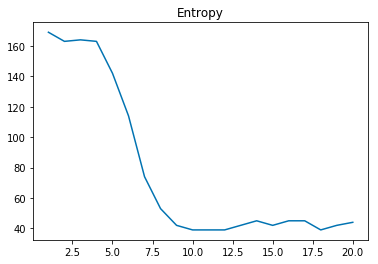

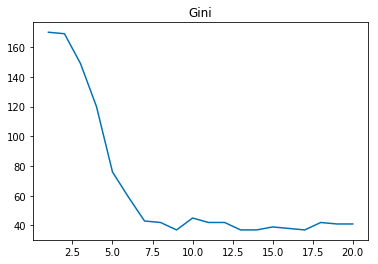

In [37]:
import tptreesource as tp
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from typing import List


def split_data(X, y):
    return [
        X[::2],
        y[::2],
        X[1::2],
        y[1::2],
    ]

def calc_error(y_pred, y):
    return np.count_nonzero(y_pred-y)

def get_tree_model(X_train, y_train, X_test, y_test, h: int, criterion: str, errors: List[float]):
    model = tree.DecisionTreeClassifier(max_depth=h, criterion=criterion).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = calc_error(y_pred, y_test)
    errors.append(err)

def q2(X, y):
    X_train, y_train, X_test, y_test = split_data(X, y)
    errors_entropy = []
    errors_gini = []
    max_d_range = range(1, 21)
    for d in max_d_range:
        get_tree_model(X_train, y_train, X_test, y_test, d, "entropy", errors_entropy)
        get_tree_model(X_train, y_train, X_test, y_test, d, "gini", errors_gini)
        
    plt.figure()
    plt.title("Entropy")
    plt.plot(max_d_range, errors_entropy)
    plt.figure()
    plt.title("Gini")
    plt.plot(max_d_range, errors_gini)
    return [errors_entropy, errors_gini]
    

def get_data(_n):
    n = int(_n / 4)
    data = tp.rand_checkers(n, n, n, n)
    X = data[:,0:2]
    y = data[:,2]
    return X, y

X, y = get_data(456)
q2_errors_entropy, q2_errors_gini = q2(X, y)

## Question 3

Afficher la règle de classification obtenues en utilisant la profondeur qui minimise le pourcentage d’erreurs obtenues avec l’entropie et avec l’indice de Gini (utiliser si besoin les fonctions `plot_2d` et `frontiere` du fichier source).

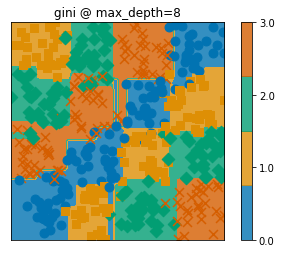

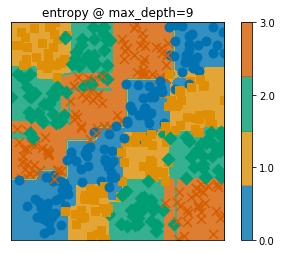

In [38]:
def graph_model(X, y, criterion: str, d: int):
    plt.figure()
    plt.title(criterion + " @ max_depth=" + str(d))
    model = tree.DecisionTreeClassifier(max_depth=d, criterion=criterion).fit(X, y)
    tp.frontiere_new(lambda vec: model.predict(vec.reshape(1,-1)), X, y)

def q3(X, y, errors_entropy, errors_gini):
    # X_train, y_train, X_test, y_test = split_data(X, y)
    best_d_gini = np.argmin(errors_gini)
    best_d_entropy = np.argmin(errors_entropy)
    graph_model(X, y, "gini", best_d_gini)
    graph_model(X, y, "entropy", best_d_entropy)

q3(X, y, q2_errors_entropy, q2_errors_gini)

## Question 4

Exporter des graphiques des arbres obtenu à la question précédente en format pdf. On pourra par exemple utiliser la fonction `export_graphviz` du module tree.

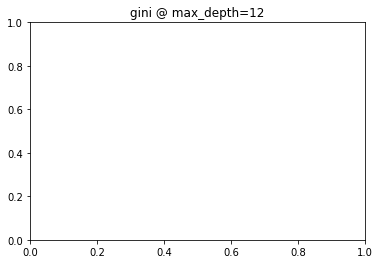

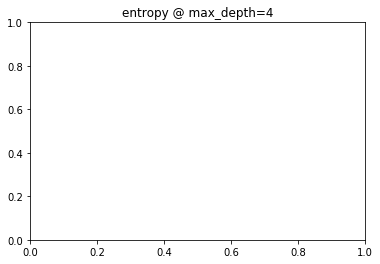

In [29]:
import os

def export_tree(X, y, criterion: str, d: int, _filename: str):
    plt.figure()
    plt.title(criterion + " @ max_depth=" + str(d))
    model = tree.DecisionTreeClassifier(max_depth=d, criterion=criterion).fit(X, y)
    filename = _filename + '.dot'
    tree.export_graphviz(model, out_file=filename)
    os.system(f"dot -Tpdf {filename} -o {_filename}.pdf")

def q4(X, y, errors_entropy, errors_gini):
    # X_train, y_train, X_test, y_test = split_data(X, y)
    best_d_gini = np.argmin(errors_gini)
    best_d_entropy = np.argmin(errors_entropy)
    export_tree(X, y, "gini", best_d_gini, "tree_gini")
    export_tree(X, y, "entropy", best_d_entropy, "tree_entropy")

q4(X, y, q2_errors_entropy, q2_errors_gini)

## Question 5

Créez $n = 160 = 40 + 40 + 40 + 40$ nouvelles données avec `rand_checkers`. Pour les arbres de décision entraînés précédemment (dans partie (2)), calculer la proportion d’erreurs faites sur cet échantillon de test. Commenter.

In [27]:
def get_q5_errors(X_train, y_train, X_test, y_test, criterion: str, max_depth: int):
    model = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return calc_error(y_pred, y_test)
    
def q5(X_train, y_train, errors_gini, errors_entropy):
    X_test, y_test = get_data(160)
    best_d_gini = np.argmin(errors_gini)
    best_d_entropy = np.argmin(errors_entropy)
    
    err_gini = get_q5_errors(X_train, y_train, X_test, y_test, "gini", best_d_gini)
    err_entropy = get_q5_errors(X_train, y_train, X_test, y_test, "entropy", best_d_entropy)
    return [err_gini, err_entropy]

q5(X, y, q2_errors_gini, q2_errors_entropy)

[32, 119]

## Question 6

Reprendre les questions précédentes pour le dataset `zipcode`. Ce jeu de données est disponible dans le module `sklearn.datasets`. On peut l’importer avec la fonction `load_digits` du dit module (ou voir pour plus de détails http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) :

    digits = datasets.load_digits()
    
On fera une découpe en train/test de taille 80% - 20%.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

def q6():
    digits = datasets.load_digits()
    return train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
    
q6()

[array([[ 0.,  0.,  3., ..., 13.,  4.,  0.],
        [ 0.,  0.,  9., ...,  3.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  9., ..., 16.,  2.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
        [ 0.,  0., 11., ...,  1.,  0.,  0.],
        [ 0.,  0.,  8., ...,  8.,  0.,  0.],
        ...,
        [ 0.,  0.,  7., ..., 10.,  0.,  0.],
        [ 0.,  0.,  7., ..., 16.,  4.,  0.],
        [ 0.,  0., 14., ...,  5.,  0.,  0.]]),
 array([6, 0, 0, ..., 2, 7, 1]),
 array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
        9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
        6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
        7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
        4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
        7, 7, 4, 4, 1, 9, 2

# Méthodes de choix de paramètres - Sélection de modèle

Il est rare de disposer en pratique d’un ensemble de test (on préfère inclure le plus grand nombre de données dans l’ensemble d’apprentissage), c’est au praticien de garder une partie de ces données à cet effet. Pour sélectionner un modèle ou un paramètre tout en considérant le plus grand nombre d’exemples possibles pour l’apprentissage, on utilise généralement une sélection par validation croisée. Pour chaque paramètre utilisé, une estimation de l’erreur empirique du classifieur est obtenue selon la procédure suivante. On fixe d’abord un entier $N$, souvent $N = 5$ ou $N = 10$, qui représente le nombre de blocs (en anglais : fold ) et un jeu de paramètre du modèle :

- l’ensemble d’apprentissage est partitionné en $N$ blocs de taille $n/N$
- pour chaque sous-ensemble possible, on mesure l’erreur obtenue par le classifieur (pour un jeu de paramètres fixé) appris sur les $N − 1$ blocs restants.
- l’erreur estimée est la moyenne de l’erreur des classifieurs appris.

On peut répéter cette procédure sur toute la grille des paramètres. Cela permet d’obtenir une mesure d’erreur pour chaque paramètre, et finalement on choisit le paramètre minimisant cette quantité. Pour plus de détails sur les variantes de ce principe implémentées dans `scikit-learn`, consultez la page http://scikit-learn.org/stable/modules/cross_validation.html.

## Question 7

Utiliser la fonction `sklearn.model_selection.cross_val_score` et tester la sur le jeu de données `zipcode` en faisant varier la profondeur de l’arbre de décision. On pourra se servir de cette fonction pour choisir la profondeur de l’arbre.

## Question 8

En s’inspirant de http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html afficher la courbe d’apprentissage (en : learning curve) pour les arbres de décisions sur le même jeu de données 2 .